In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test  = fetch_20newsgroups(subset='test')

In [3]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
newsgroups_train.target.size, newsgroups_test.target.size

(11314, 7532)

In [5]:
print(newsgroups_train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [7]:
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test  = vectorizer.transform(newsgroups_test.data)

In [8]:
y_train = newsgroups_train.target
y_test  = newsgroups_test.target

In [9]:
X_train.shape, y_train.shape

((11314, 130107), (11314,))

In [10]:
X_test.shape, y_test.shape

((7532, 130107), (7532,))

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.82793414763674988

In [14]:
X_train[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [15]:
X_train_0 = X_train[0].toarray()
X_train_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:
np.count_nonzero(X_train_0), X_train_0.shape[1]

(89, 130107)

In [17]:
X_train_0[np.nonzero(X_train_0)]

array([ 0.06332604,  0.14155753,  0.13874908,  0.0953487 ,  0.03709893,
        0.10278592,  0.02991186,  0.0871642 ,  0.16713176,  0.09353931,
        0.13280753,  0.03770449,  0.0690878 ,  0.0343176 ,  0.38133891,
        0.07801368,  0.04951999,  0.06621689,  0.10015015,  0.11603643,
        0.0845253 ,  0.05461429,  0.09714744,  0.13412921,  0.05747015,
        0.08646963,  0.1558717 ,  0.02921528,  0.08342748,  0.03542092,
        0.06363421,  0.09785516,  0.02245166,  0.07313444,  0.07325812,
        0.05097865,  0.04280825,  0.09219024,  0.35383501,  0.01921946,
        0.09036441,  0.0690878 ,  0.06339409,  0.05989857,  0.10936401,
        0.03955173,  0.08844382,  0.03696979,  0.07000411,  0.13157119,
        0.03567186,  0.06521174,  0.05715821,  0.03188937,  0.01992886,
        0.0454964 ,  0.04114286,  0.09913274,  0.05545703,  0.03447138,
        0.10826904,  0.16068606,  0.05666562,  0.08171219,  0.0846283 ,
        0.09869735,  0.07526016,  0.10844725,  0.10809248,  0.01

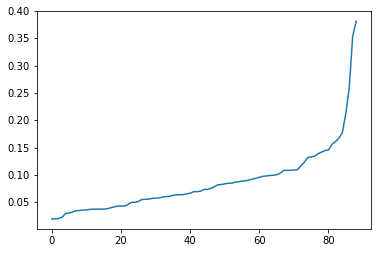

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(X_train_0[np.nonzero(X_train_0)]))

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

In [20]:
from sklearn.model_selection import GridSearchCV

param = {'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}

gs1 = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs1.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.01 .............................................
[CV] bin__threshold=0.01 .............................................
[CV] bin__threshold=0.01 .............................................
[CV] bin__threshold=0.05 .............................................
[CV] bin__threshold=0.05 .............................................
[CV] .............................. bin__threshold=0.05, total=  30.1s
[CV] bin__threshold=0.05 .............................................
[CV] .............................. bin__threshold=0.05, total=  30.3s
[CV] bin__threshold=0.1 ..............................................
[CV] .............................. bin__threshold=0.01, total=  52.6s
[CV] bin__thresho

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  1.2min remaining:   17.1s


[CV] ............................... bin__threshold=0.3, total=   8.9s
[CV] ............................... bin__threshold=0.4, total=   6.3s
[CV] ............................... bin__threshold=0.4, total=   5.1s
[CV] ............................... bin__threshold=0.4, total=   3.3s


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [21]:
gs1.best_params_, gs1.best_score_, gs1.best_estimator_

({'bin__threshold': 0.05},
 0.89137351953332156,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [22]:
gs1.score(X_test, y_test)

0.82222517259691985

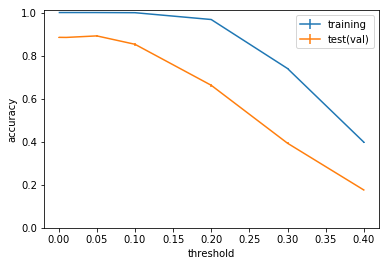

In [23]:
plt.errorbar(gs1.cv_results_['param_bin__threshold'].data, 
             gs1.cv_results_['mean_train_score'], 
             yerr=gs1.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs1.cv_results_['param_bin__threshold'].data,
             gs1.cv_results_['mean_test_score'], 
             yerr=gs1.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(0, 1.01)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [24]:
pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs11.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] clf__C=10000000.0, bin__threshold=0.05 ..........................
[CV] clf__C=10000000.0, bin__threshold=0.05 ..........................
[CV] clf__C=10000000.0, bin__threshold=0.05 ..........................
[CV] clf__C=10.0, bin__threshold=0.01 ................................
[CV] clf__C=10.0, bin__threshold=0.01 ................................
[CV] clf__C=10.0, bin__threshold=0.01 ................................
[CV] clf__C=10000000.0, bin__threshold=0.01 ..........................
[CV] clf__C=10000000.0, bin__threshold=0.01 ..........................
[CV] ........... clf__C=10000000.0, bin__threshold=0.05, total=  41.3s
[CV] ........... clf__C=10000000.0, bin__threshold=0.05, total=  41.2s
[CV] clf__C=10000000.0, bin__threshold=0.01 ..........................
[CV] clf__C=1000000000.0, bin__threshold=0.05 ........................
[CV] ........... clf__C=10000000.0, bin__threshold=0.05, total=  42.9s
[CV] clf__C=1000

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.1min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [25]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 10.0},
 0.89172706381474276,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [26]:
gs11.score(X_test, y_test)

0.82116303770578869

In [27]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LinearSVC())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs2 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] clf__C=1000.0, bin__threshold=0.05 ..............................
[CV] clf__C=1000.0, bin__threshold=0.05 ..............................
[CV] clf__C=1000.0, bin__threshold=0.05 ..............................
[CV] clf__C=1000.0, bin__threshold=0.01 ..............................
[CV] clf__C=1000.0, bin__threshold=0.01 ..............................
[CV] clf__C=1000.0, bin__threshold=0.01 ..............................
[CV] clf__C=100.0, bin__threshold=0.05 ...............................
[CV] clf__C=100.0, bin__threshold=0.05 ...............................
[CV] ............... clf__C=1000.0, bin__threshold=0.05, total=  18.5s
[CV] clf__C=100.0, bin__threshold=0.05 ...............................
[CV] ............... clf__C=1000.0, bin__threshold=0.05, total=  18.7s
[CV] clf__C=10000.0, bin__threshold=0.001 ............................
[CV] ............... clf__C=1000.0, bin__threshold=0.05, total=  21.5s
[CV] clf__C=1000

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [28]:
gs2.best_params_, gs2.best_score_, gs2.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 1000.0},
 0.88138589358317132,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LinearSVC(C=1000.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))]))

In [29]:
gs2.score(X_test, y_test)

0.79779607010090281

In [30]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', SGDClassifier(loss="hinge") )])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__alpha': 10**np.arange(-10.0, -1.0) }

from sklearn.model_selection import RandomizedSearchCV

gs22 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs22.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] clf__alpha=0.0001, bin__threshold=0.01 ..........................
[CV] clf__alpha=0.0001, bin__threshold=0.01 ..........................
[CV] clf__alpha=0.0001, bin__threshold=0.01 ..........................
[CV] clf__alpha=1e-10, bin__threshold=0.001 ..........................
[CV] clf__alpha=1e-10, bin__threshold=0.001 ..........................
[CV] clf__alpha=1e-10, bin__threshold=0.001 ..........................
[CV] clf__alpha=0.0001, bin__threshold=0.05 ..........................
[CV] clf__alpha=0.0001, bin__threshold=0.05 ..........................
[CV] ........... clf__alpha=0.0001, bin__threshold=0.05, total=   1.3s
[CV] ........... clf__alpha=0.0001, bin__threshold=0.05, total=   1.3s
[CV] clf__alpha=0.0001, bin__threshold=0.05 ..........................
[CV] ........... clf__alpha=0.0001, bin__threshold=0.01, total=   1.6s
[CV] clf__alpha=1e-07, bin__threshold=0.01 ...........................
[CV] ...........

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [31]:
gs22.best_params_, gs22.best_score_, gs22.best_estimator_

({'bin__threshold': 0.05, 'clf__alpha': 0.01},
 0.89075481704083437,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False))]))

In [32]:
gs22.score(X_test, y_test)

0.82103027084439728

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gs22.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.7594    0.7618    0.7606       319
          1     0.7165    0.7147    0.7156       389
          2     0.7044    0.7741    0.7376       394
          3     0.7443    0.6684    0.7043       392
          4     0.7764    0.8208    0.7980       385
          5     0.8571    0.7443    0.7967       395
          6     0.8186    0.9026    0.8585       390
          7     0.8515    0.8687    0.8600       396
          8     0.9268    0.9221    0.9244       398
          9     0.8976    0.9270    0.9120       397
         10     0.9125    0.9674    0.9392       399
         11     0.8838    0.9217    0.9023       396
         12     0.7892    0.7048    0.7446       393
         13     0.8901    0.8384    0.8635       396
         14     0.8589    0.9112    0.8842       394
         15     0.7785    0.9271    0.8463       398
         16     0.6945    0.9368    0.7977       364
         17     0.9477    0.8670    0.9056   

In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[243,   2,   0,   0,   1,   1,   1,   1,   0,   1,   0,   1,   1,
          6,   8,  31,   2,   3,   0,  17],
       [  2, 278,  19,   6,  10,  25,   8,   3,   4,   0,   0,   6,  11,
          2,   6,   2,   4,   0,   1,   2],
       [  2,  20, 305,  23,  13,   5,   1,   2,   1,   4,   3,   4,   2,
          1,   4,   0,   2,   0,   1,   1],
       [  1,   7,  38, 262,  27,   6,   8,   8,   1,   1,   1,   4,  24,
          0,   3,   0,   1,   0,   0,   0],
       [  0,   4,  10,  20, 316,   1,  10,   5,   0,   5,   0,   1,   6,
          3,   2,   0,   1,   0,   1,   0],
       [  1,  39,  39,   4,   2, 294,   5,   0,   0,   1,   1,   1,   1,
          1,   5,   0,   1,   0,   0,   0],
       [  0,   1,   3,   8,   5,   0, 352,   4,   1,   4,   2,   1,   5,
          3,   1,   0,   0,   0,   0,   0],
       [  0,   2,   2,   2,   1,   0,  10, 344,  12,   1,   0,   1,  11,
          1,   1,   0,   5,   0,   3,   0],
       [  0,   1,   0,   1,   1,   0,   8,  15, 367,   2,   0,  

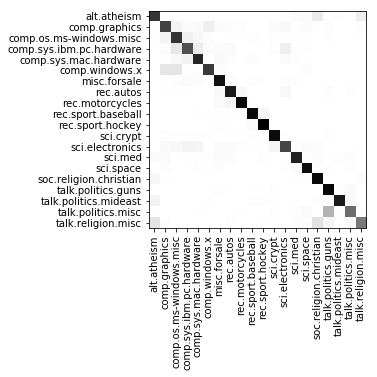

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

plt.imshow(1- conf_mat / conf_mat.sum(axis=1),
           interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names);
plt.xticks(range(20), newsgroups_train.target_names, rotation=90);